In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
import os
print(os.listdir())
from google.colab import files
files.upload()  # Re-upload the file


['.config', 'Zomato-data-.csv', 'sample_data']


{}

In [ ]:
dataset=pd.read_csv('Zomato-data-.csv')


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [ ]:
dataset.isnull().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


no null value so directly we are proceeding

In [ ]:
dataset.drop_duplicates(inplace=True)

In [ ]:
dataset['online_order']=dataset['online_order'].map({'Yes':True,'No':False})
dataset['book_table']=dataset['book_table'].map({'Yes':True,'No':False})
# Convert 'rate' column to string type before applying .str.replace
dataset['rate'] = dataset['rate'].astype(str).str.replace('/5', '', regex=True)
dataset['rate'] = pd.to_numeric(dataset['rate'], errors='coerce')



EDA(Exploratory Data Analysis)

In [ ]:
dataset.describe(include='all')

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
count,148,148,148,148.000000,148.000000,148.000000,148
unique,145,2,2,NaN,NaN,NaN,4
top,San Churro Cafe,False,False,NaN,NaN,NaN,Dining
freq,2,90,140,NaN,NaN,NaN,110
mean,NaN,NaN,NaN,3.633108,264.810811,418.243243,NaN
std,NaN,NaN,NaN,0.402271,653.676951,223.085098,NaN
min,NaN,NaN,NaN,2.600000,0.000000,100.000000,NaN
25%,NaN,NaN,NaN,3.300000,6.750000,200.000000,NaN
50%,NaN,NaN,NaN,3.700000,43.500000,400.000000,NaN
75%,NaN,NaN,NaN,3.900000,221.750000,600.000000,NaN


In [ ]:
dataset.nunique()

,0
name,145
online_order,2
book_table,2
rate,19
votes,90
approx_cost(for two people),18
listed_in(type),4


Checking Outliers


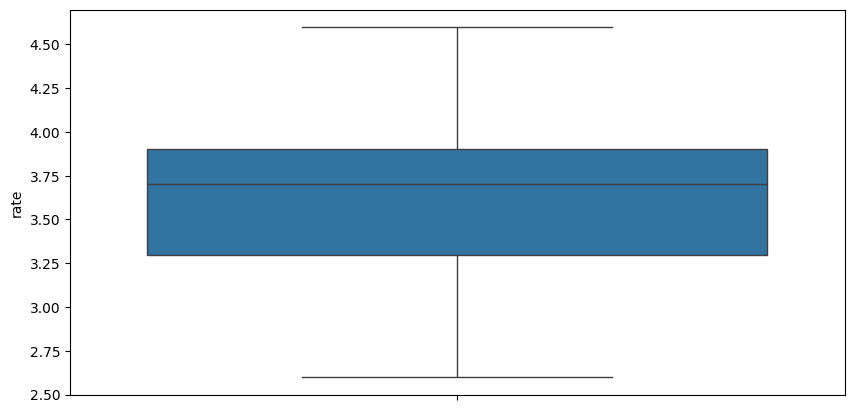

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(dataset['rate'])  # Replace with numerical column
plt.show()


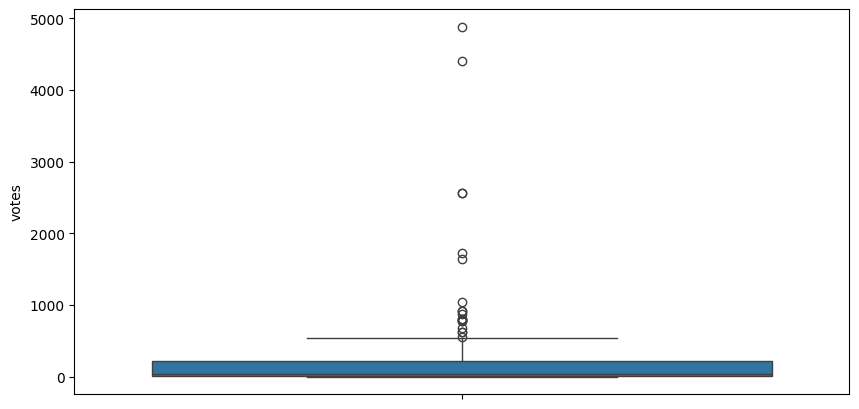

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(dataset['votes'])  # Replace with numerical column
plt.show()



In [ ]:
print(dataset.columns)

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')


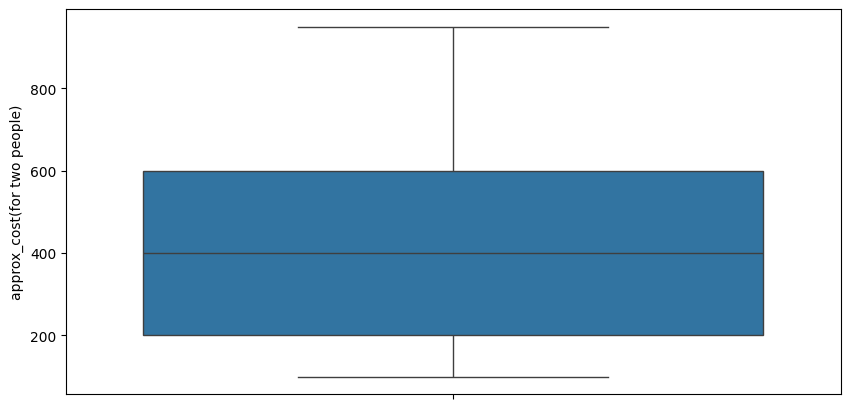

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(dataset['approx_cost(for two people)'])
plt.show()

In [ ]:
dataset[dataset['votes'] > dataset['votes'].quantile(0.99)]


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
38,Empire Restaurant,True,False,4.4,4884,750,other
86,Meghana Foods,True,False,4.4,4401,600,Dining


data correlation
(relation between the numerical columns)


In [ ]:
print(dataset.dtypes)

name                            object
online_order                      bool
book_table                        bool
rate                           float64
votes                            int64
approx_cost(for two people)      int64
listed_in(type)                 object
dtype: object


In [ ]:
dataset['name'] = dataset['name'].astype('category').cat.codes  # Assigns numbers to each category
dataset['listed_in(type)'] = dataset['listed_in(type)'].astype('category').cat.codes  # Assigns numbers to each category


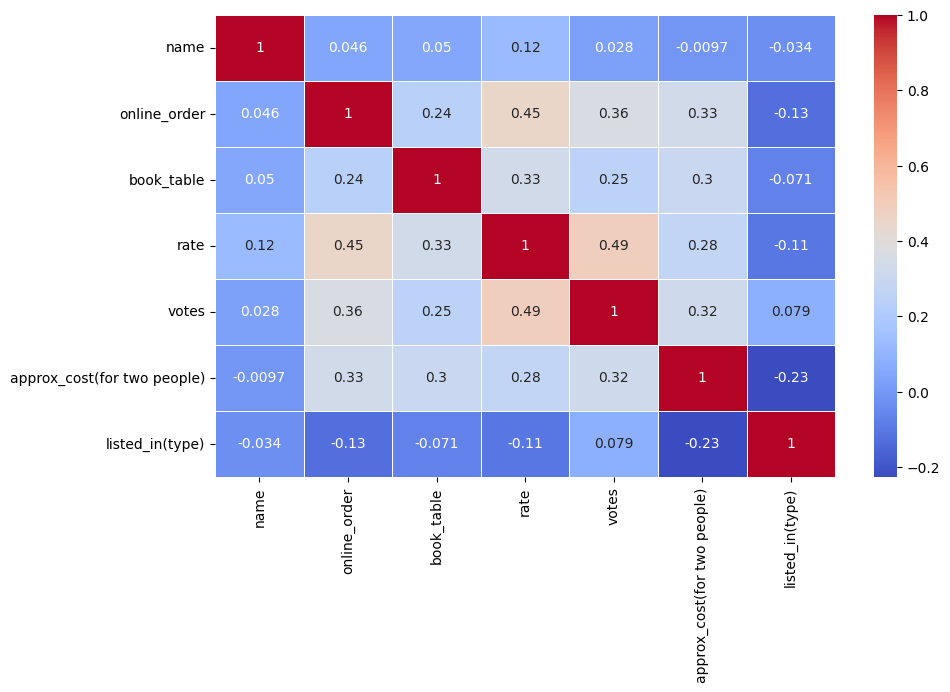

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


DATA_VISUALIZATION

Restaurant Rating Analysis

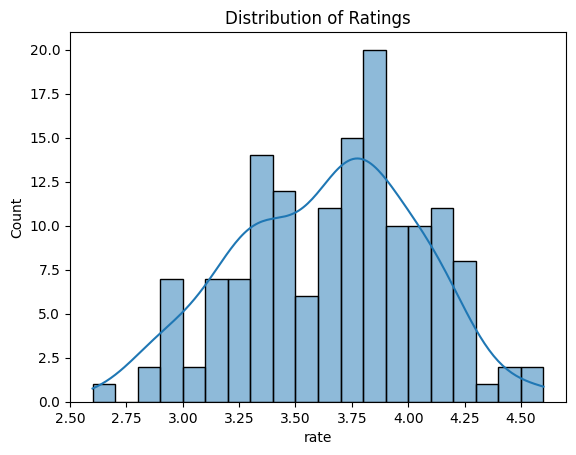

In [ ]:
sns.histplot(dataset['rate'], bins=20, kde=True)
plt.title("Distribution of Ratings")
plt.show()


Restaurant Type  count


<ipython-input-19-7170fa070449>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset['listed_in(type)'].value_counts().index,


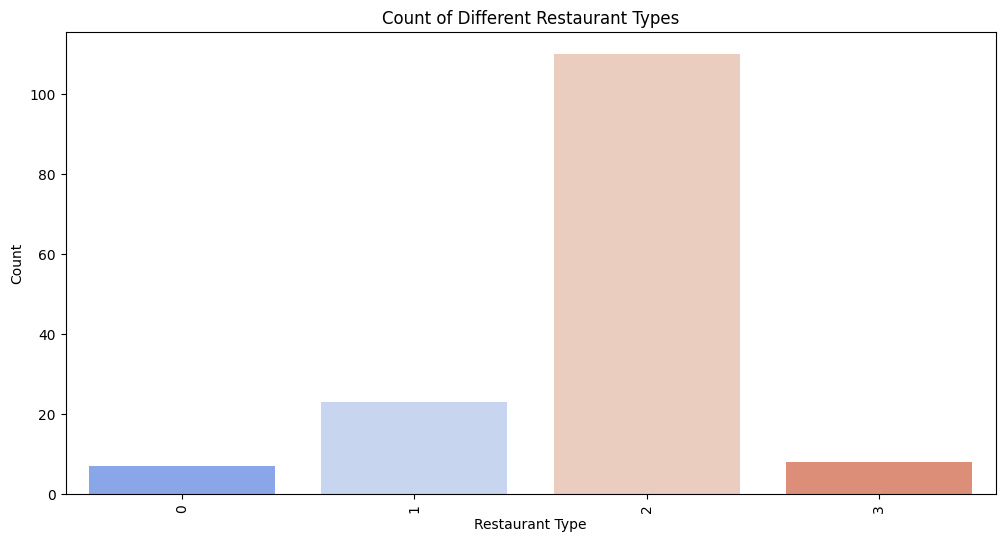

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=dataset['listed_in(type)'].value_counts().index,
            y=dataset['listed_in(type)'].value_counts().values,
            palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Restaurant Type")
plt.ylabel("Count")
plt.title("Count of Different Restaurant Types")
plt.show()


Rating vs cost

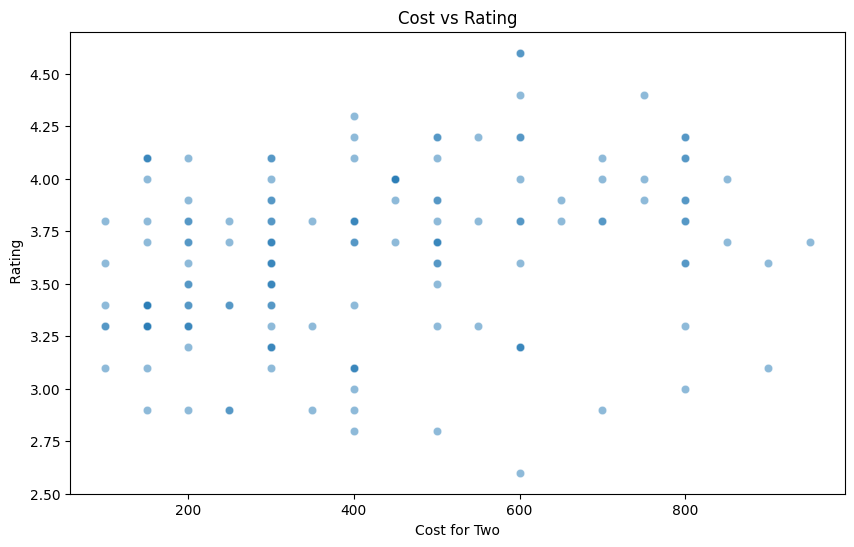

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=dataset['approx_cost(for two people)'], y=dataset['rate'], alpha=0.5)
plt.xlabel("Cost for Two")
plt.ylabel(" Rating")
plt.title("Cost vs Rating")
plt.show()



Online order preference ny Restaurtant type


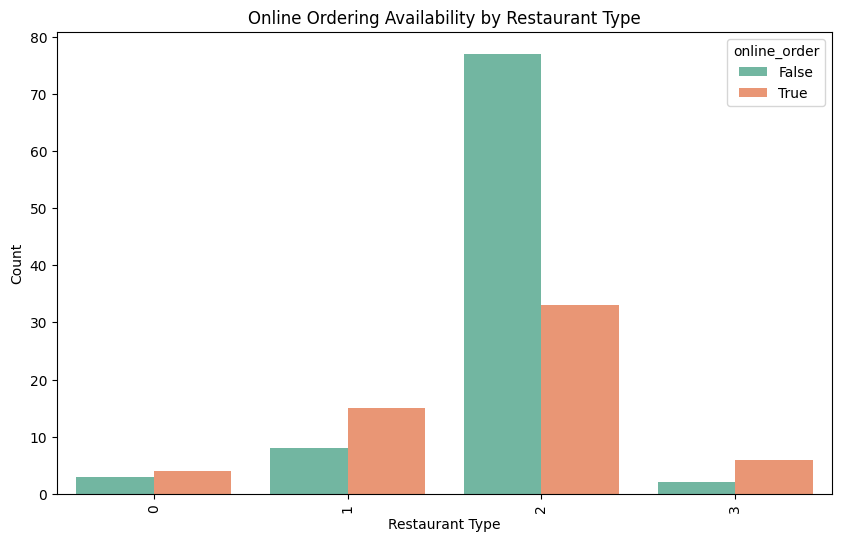

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=dataset['listed_in(type)'], hue=dataset['online_order'], palette="Set2")
plt.xticks(rotation=90)
plt.xlabel("Restaurant Type")
plt.ylabel("Count")
plt.title("Online Ordering Availability by Restaurant Type")
plt.show()


4Votes vs. Restaurant Type

<ipython-input-22-5c7d494b6dc3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dataset['listed_in(type)'], y=dataset['votes'], palette="coolwarm")


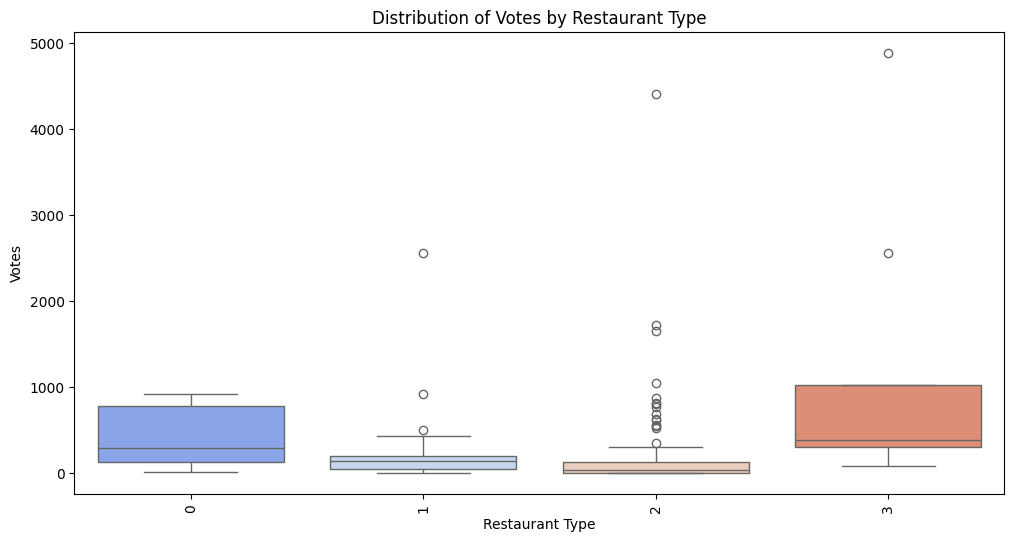

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=dataset['listed_in(type)'], y=dataset['votes'], palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Restaurant Type")
plt.ylabel("Votes")
plt.title("Distribution of Votes by Restaurant Type")
plt.show()


In [ ]:
dataset.to_csv("cleaned_zomato_data.csv", index=False)